# Sentiment analysis for depression based on social media post - Twitter

In [ ]:
!pip install textblob
!pip install nltk 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#import required libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# load the dataset
df_twitter=pd.read_csv("/content/drive/MyDrive/Georgian/2ndSem/Infra & Architecure/Mental-Health-Twitter.csv")

# Exploratory Data Analysis

In [ ]:
df_twitter.describe()

,Unnamed: 0,post_id,user_id,followers,friends,favourites,statuses,retweets,label
count,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,9999.500000,6.874728e+17,3.548622e+16,900.483950,782.428750,6398.235550,4.439442e+04,1437.927300,0.500000
std,5773.647028,1.708396e+17,1.606083e+17,1899.913961,1834.817945,8393.072914,1.407785e+05,15119.665118,0.500013
min,0.000000,3.555966e+09,1.472438e+07,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,4999.750000,5.931685e+17,3.242944e+08,177.000000,211.000000,243.000000,5.129000e+03,0.000000,0.000000
50%,9999.500000,7.637400e+17,1.052122e+09,476.000000,561.000000,2752.000000,1.325100e+04,0.000000,0.500000
75%,14999.250000,8.153122e+17,2.285923e+09,1197.000000,701.000000,8229.000000,5.289200e+04,1.000000,1.000000
max,19999.000000,8.194570e+17,7.631820e+17,28614.000000,28514.000000,39008.000000,1.063601e+06,839540.000000,1.000000


In [ ]:
df_twitter.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,6.378950e+17,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1.013187e+09,84,211,251,837,0,1
1,1,6.378900e+17,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1.013187e+09,84,211,251,837,1,1
2,2,6.377490e+17,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1.013187e+09,84,211,251,837,0,1
3,3,6.376960e+17,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1.013187e+09,84,211,251,837,2,1
4,4,6.376960e+17,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1.013187e+09,84,211,251,837,1,1


In [ ]:
df_twitter.info 

<bound method DataFrame.info of        Unnamed: 0       post_id                    post_created  \
0               0  6.378950e+17  Sun Aug 30 07:48:37 +0000 2015   
1               1  6.378900e+17  Sun Aug 30 07:31:33 +0000 2015   
2               2  6.377490e+17  Sat Aug 29 22:11:07 +0000 2015   
3               3  6.376960e+17  Sat Aug 29 18:40:49 +0000 2015   
4               4  6.376960e+17  Sat Aug 29 18:40:26 +0000 2015   
...           ...           ...                             ...   
19995       19995  8.193370e+17  Thu Jan 12 00:14:56 +0000 2017   
19996       19996  8.193350e+17  Thu Jan 12 00:06:18 +0000 2017   
19997       19997  8.193350e+17  Thu Jan 12 00:05:42 +0000 2017   
19998       19998  8.193340e+17  Thu Jan 12 00:05:22 +0000 2017   
19999       19999  8.193340e+17  Thu Jan 12 00:04:47 +0000 2017   

                                               post_text       user_id  \
0      It's just over 2 years since I was diagnosed w...  1.013187e+09   
1      It's Sun

In [ ]:
df_twitter.shape

(20000, 11)

In [ ]:
#Checking for missing values
df_twitter.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [ ]:
df_twitterNew = df_twitter.drop(columns=["Unnamed: 0", "post_id","user_id","post_created"])

In [ ]:
df_twitterNew.head()

,post_text,followers,friends,favourites,statuses,retweets,label
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1


In [ ]:
df_twitterNew.shape

(20000, 7)

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_twitterNew.corr()


In [ ]:
corr_matrix

,followers,friends,favourites,statuses,retweets,label
followers,1.000000,0.891919,-0.016242,-0.000215,0.001500,-0.011181
friends,0.891919,1.000000,-0.081756,-0.045420,0.009946,0.119818
favourites,-0.016242,-0.081756,1.000000,-0.053930,0.069551,-0.252289
statuses,-0.000215,-0.045420,-0.053930,1.000000,-0.005193,-0.246473
retweets,0.001500,0.009946,0.069551,-0.005193,1.000000,-0.025198
label,-0.011181,0.119818,-0.252289,-0.246473,-0.025198,1.000000


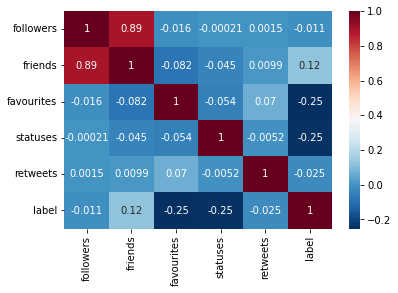

In [ ]:
# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r")

# Show the plot
plt.show()

positive correlations are shown in red and negative correlations are shown in blue

#Pre-Processing

In [ ]:
#applies lowercase conversion to all words in the "post_text" column
df_twitterNew["post_text"] = df_twitterNew["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [ ]:
#removes all digits (0-9) from the "post_text" column
df_twitterNew["post_text"] = df_twitterNew["post_text"].str.replace("\d","")

<ipython-input-27-9c71d89ee025>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_twitterNew["post_text"] = df_twitterNew["post_text"].str.replace("\d","")


In [ ]:
# define the stopwords and also import predefined ones
from nltk.corpus import stopwords
import string
stop=set(stopwords.words("english"))
# Extract punctuation marks
punct_exclude=set(string.punctuation)

In [ ]:
#removes all non-alphanumeric characters (i.e., all characters except letters, numbers, and spaces) from the "post_text" column
df_twitterNew["post_text"] = df_twitterNew["post_text"].str.replace("[^\w\s]","")

<ipython-input-34-e3ee131e6bce>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_twitterNew["post_text"] = df_twitterNew["post_text"].str.replace("[^\w\s]","")


In [ ]:
#code removes all stopwords (i.e., common words such as "the", "and", "a", etc.) from the "post_text" column
sw = stopwords.words("english")
df_twitterNew["post_text"] = df_twitterNew["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [ ]:
#applies lemmatization
df_twitterNew["post_text"] = df_twitterNew["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

In [ ]:
df_twitterNew

,post_text,followers,friends,favourites,statuses,retweets,label
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1
1,sunday need break im planning spend little tim...,84,211,251,837,1,1
2,awake tired need sleep brain ideas,84,211,251,837,0,1
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1
4,hard say whether packing lists making life eas...,84,211,251,837,1,1
...,...,...,...,...,...,...,...
19995,day without sunshine like night,442,230,7,1063601,0,0
19996,borens laws charge ponder trouble delegate dou...,442,230,7,1063601,0,0
19997,flow chart thoroughly oversold piece program d...,442,230,7,1063601,0,0
19998,ships safe harbor never meant stay,442,230,7,1063601,0,0


In [ ]:
#tokenizes the "post_text" column using the word_tokenize() function from the Natural Language Toolkit (nltk)
df_twitterNew["tokens"] = df_twitterNew["post_text"].apply(lambda x: TextBlob(x).words)

In [ ]:
#calculates the word frequency
df_twitterNew["frequency"] = df_twitterNew["post_text"].apply(lambda x: len(str(x).split(" "))) 

In [ ]:
df_twitterNew.groupby("frequency").max()
df_twitterNew[df_twitterNew["post_text"].str.contains("sos unique")]

,post_text,followers,friends,favourites,statuses,retweets,label,tokens,frequency
3038,rt sos unique new york unique new york unique ...,1505,2082,6920,13251,21168,1,"[rt, sos, unique, new, york, unique, new, york...",27


In [ ]:
#concatenates all the individual text strings in that column into a single long string, text. 
#The resulting string contains all the words from all the individual text strings in the "post_text" column, separated by spaces
tweetWords = " ".join(i for i in df_twitterNew.post_text)

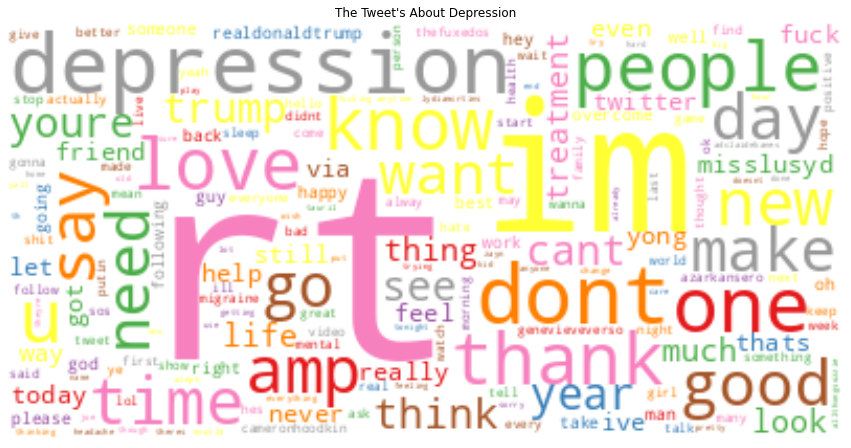

In [ ]:
wordcloud = WordCloud(
    background_color="white",
    colormap="Set1",
    collocations=False).generate(tweetWords)

plt.figure(figsize=[15,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About Depression")
plt.show()

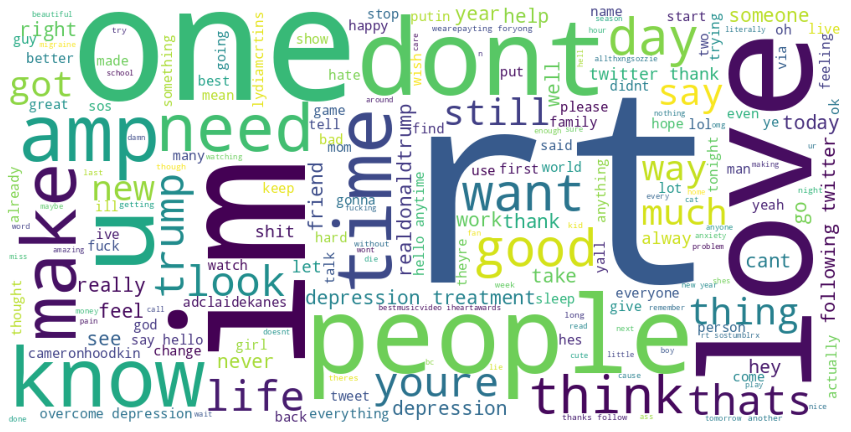

In [ ]:
wordcloud= WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(tweetWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Sentiment Analysis Using TextBlob

Calculating the sentiment polarity and subjectivity of each text string in the "post_text" column using the TextBlob library. It creates an empty list called blob_twitterdf and then appends a tuple containing the polarity and subjectivity scores to this list for each text string.

In [ ]:
blob_twitterdf = []

for i in df_twitterNew["post_text"]:
    blob = TextBlob(i).sentiment
    blob_twitterdf.append(blob)

In [ ]:
df2 = pd.DataFrame(blob_twitterdf)
df_blob = pd.concat([df_twitterNew.reset_index(drop=True), df2], axis=1)

In [ ]:
df_blob.head()

,post_text,followers,friends,favourites,statuses,retweets,label,tokens,frequency,polarity,subjectivity
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,"[years, since, diagnosed, anxiety, depression,...",14,0.100000,1.000000
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,"[sunday, need, break, im, planning, spend, lit...",9,-0.093750,0.750000
2,awake tired need sleep brain ideas,84,211,251,837,0,1,"[awake, tired, need, sleep, brain, ideas]",6,-0.400000,0.700000
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,"[rt, sewhq, retro, bears, make, perfect, gifts...",16,0.900000,0.875000
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,"[hard, say, whether, packing, lists, making, l...",14,-0.045833,0.370833


In [ ]:
#creating a new column in the pandas DataFrame df_blob3 called "Sentiment" that classifies each text string in the "post_text" column 
#as either "Positive" or "Negative" based on its polarity score
df_blob["Sentiment"] =  np.where(df_blob["polarity"] >= 0 , "Positive", "Negative")

In [ ]:
df_blob.head()

,post_text,followers,friends,favourites,statuses,retweets,label,tokens,frequency,polarity,subjectivity,Sentiment
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,"[years, since, diagnosed, anxiety, depression,...",14,0.100000,1.000000,Positive
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,"[sunday, need, break, im, planning, spend, lit...",9,-0.093750,0.750000,Negative
2,awake tired need sleep brain ideas,84,211,251,837,0,1,"[awake, tired, need, sleep, brain, ideas]",6,-0.400000,0.700000,Negative
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,"[rt, sewhq, retro, bears, make, perfect, gifts...",16,0.900000,0.875000,Positive
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,"[hard, say, whether, packing, lists, making, l...",14,-0.045833,0.370833,Negative


The above table shows the classified text into positive and negative comments

In [ ]:
sentimentResults = df_blob["Sentiment"].value_counts()

# Visualization of the results

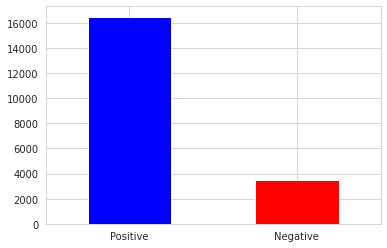

In [ ]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sentimentResults.plot(kind="bar", rot=0, color=["blue","red"]);

In [ ]:
df_blob.groupby("Sentiment").count()

,post_text,followers,friends,favourites,statuses,retweets,label,tokens,frequency,polarity,subjectivity
Sentiment,,,,,,,,,,,
Negative,3517,3517,3517,3517,3517,3517,3517,3517,3517,3517,3517
Positive,16483,16483,16483,16483,16483,16483,16483,16483,16483,16483,16483


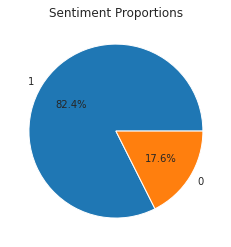

In [ ]:
# Get the sentiment results as a Pandas Series
sentimentResults = df_blob["Sentiment"].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.set_title("Sentiment Proportions")
ax.pie(sentimentResults, labels=sentimentResults.index, autopct='%1.1f%%')

# Show the plot
plt.show()

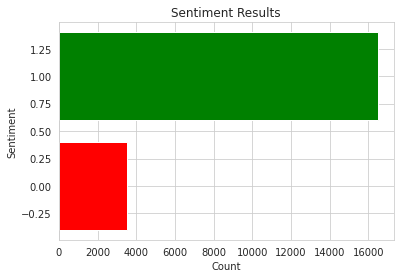

In [ ]:
# Get the sentiment results as a Pandas Series
sentimentResults = df_blob["Sentiment"].value_counts()

# Create a dictionary to map sentiment labels to binary values
sentimentMap = {"Positive": 1, "Negative": 0}

# Map the sentiment labels to binary values
binarySentiments = sentimentResults.index.map(sentimentMap)

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.set_title("Sentiment Results")
ax.set_xlabel("Count")
ax.set_ylabel("Sentiment")
ax.barh(sentimentResults.index, sentimentResults, color=['green', 'red'])

# Show the plot
plt.show()


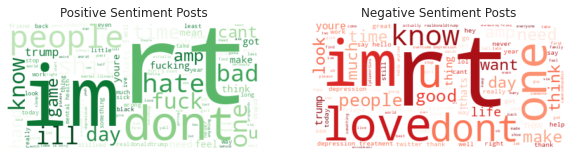

In [ ]:
from wordcloud import WordCloud

# Get the positive and negative sentiment posts as separate DataFrames
positive_posts = df_blob[df_blob["Sentiment"] == 0]
negative_posts = df_blob[df_blob["Sentiment"] == 1]

# Create a WordCloud object for positive sentiment posts if there is data available
if len(positive_posts) > 0:
    positive_wc = WordCloud(background_color="white", colormap="Greens").generate(" ".join(positive_posts["post_text"]))
else:
    print("No positive posts found.")

# Create a WordCloud object for negative sentiment posts if there is data available
if len(negative_posts) > 0:
    negative_wc = WordCloud(background_color="white", colormap="Reds").generate(" ".join(negative_posts["post_text"]))
else:
    print("No negative posts found.")

# Plot the WordClouds side by side if there is data available
if len(positive_posts) > 0 and len(negative_posts) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(positive_wc, interpolation="bilinear")
    ax1.axis("off")
    ax1.set_title("Positive Sentiment Posts")
    ax2.imshow(negative_wc, interpolation="bilinear")
    ax2.axis("off")
    ax2.set_title("Negative Sentiment Posts")
    plt.show()
else:
    print("No posts found.")


In [ ]:
df_blob.groupby("polarity").max()

,post_text,followers,friends,favourites,statuses,retweets,label,tokens,frequency,subjectivity,Sentiment,cleaned_text
polarity,,,,,,,,,,,,
-1.000000,worst bumbling stumbling statement ive seen in...,3088,2389,24407,1063601,39124,1,"[worst, bumbling, stumbling, statement, ive, s...",15,1.000000,0,worst bumbling stumbling statement ive seen in...
-0.900000,sickening httpstcokoohihbrx,677,2057,8375,12913,29,1,"[sickening, httpstcokoohihbrx]",10,1.000000,0,sickening httpstcokoohihbrx
-0.900000,keitholbermann thats one word would go traitor...,126,621,22,2111,2,0,"[keitholbermann, thats, one, word, would, go, ...",10,1.000000,0,keitholbermann thats one word would go traitor...
-0.875000,gop lawmaker asks twitter vote whether obamaca...,884,2389,8466,57269,0,0,"[gop, lawmaker, asks, twitter, vote, whether, ...",13,1.000000,0,gop lawmaker asks twitter vote whether obamaca...
-0.857143,sick perceived anything everything im told dri...,288,988,280,6694,0,1,"[sick, perceived, anything, everything, im, to...",8,0.928571,0,sick perceived anything everything im told dri...
...,...,...,...,...,...,...,...,...,...,...,...,...
0.850000,woof_all__pets beautiful kitty,3088,2389,32804,86352,20349,1,"[woofallpets, beautiful, kitty]",12,1.000000,1,woofallpets beautiful kitty
0.866667,saw pitch perfect daughter today loved rebel w...,734,1899,154,5929,0,1,"[saw, pitch, perfect, daughter, today, loved, ...",10,0.933333,1,saw pitch perfect daughter today loved rebel w...
0.883333,rt phoebejtonkin happy birthday beautiful shel...,235,185,24407,22302,1426,0,"[rt, phoebejtonkin, happy, birthday, beautiful...",13,0.766667,1,rt phoebejtonkin happy birthday beautiful shel...


# Conclusion
There are 3517 posts labeled as "Negative" and 16483 posts labeled as "Positive". 


There is a research that suggests that certain patterns of language use, including the use of specific parts of speech, can be indicative of depression. For example, studies have found that individuals with depression tend to use more negative emotion words, fewer positive emotion words, and more first-person singular pronouns in their language compared to individuals without depression.

Part-of-speech tagging can be used to identify these patterns of language use by extracting the frequency of different parts of speech used in a text. For example, by counting the number of negative emotion words, positive emotion words, and first-person singular pronouns in a text, we can calculate features that may be indicative of depression.

#Sentiment Analyisis Accuracy Using Different Algorithms

Naive Bayes and Logistic Regression are two popular and widely used algorithms for sentiment analysis. Naive Bayes is generally faster and requires less training data than Logistic Regression, making it a good choice for small datasets. On the other hand, Logistic Regression can handle more complex models and is more flexible in terms of handling features, making it a good choice for larger and more diverse datasets.

In [ ]:
# Replace "Positive" with 1 and "Negative" with 0
df_blob["Sentiment"] = df_blob["Sentiment"].replace({"Positive": 1, "Negative": 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_blob["post_text"], df_blob["Sentiment"], test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_vectorized, y_train)

# Predict the sentiment on the test set
y_pred = nb.predict(X_test_vectorized)

# Calculate the confusion matrix
confusion_matrix(y_test, y_pred)


array([[  72,  996],
       [   0, 4932]])

In [ ]:
# Remove non-alphanumeric characters
df_blob['cleaned_text'] = df_blob['post_text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

# Convert text to lowercase
df_blob['cleaned_text'] = df_blob['cleaned_text'].apply(lambda x: x.lower())

# Tokenize text data
df_blob['tokens'] = df_blob['cleaned_text'].apply(lambda x: word_tokenize(x))

# Remove stop words
stop_words = set(stopwords.words('english'))
df_blob['tokens'] = df_blob['tokens'].apply(lambda x: [word for word in x if not word in stop_words])

# Convert tokenized text into numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_blob['cleaned_text'])
y = df_blob['Sentiment']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a Naive Bayes classifier on the training data
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Use the trained classifier to predict the sentiment of the test data
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.83925


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = df_blob["post_text"]
y = df_blob["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = Pipeline([('tfidf', TfidfVectorizer(lowercase=True)),
                   ('clf', LogisticRegression(n_jobs=1, C=1e5))])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = (y_pred == y_test).mean()

print(f"Accuracy: {accuracy}")


Accuracy: 0.9375


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Conclusion



Accuracy using Naive Bayes classifier is 83.925 whereas the Logistic Regression is 93.75 percentage. Hence the model performs better using logistic regression for the dataset used for sentiment analysis